In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

results_both = []
for channels in range(12):
    try:
        with open(f'/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-{channels}_channels_off-no_additional_noise-impute_only_missing/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
            b = pickle.load(handle)
        bdf = pd.DataFrame(b)
        results_both.append(bdf)
    except:
        continue
results_both = pd.concat(results_both,axis=0,ignore_index=True)
results_both['sample'] = "warm_start"

results_both_cold = []
for channels in range(7):
    try:
        with open(f'/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-{channels}_channels_off-no_additional_noise-impute_only_missing-cold_start/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
            b = pickle.load(handle)
        bdf = pd.DataFrame(b)
        results_both_cold.append(bdf)
    except:
        continue
results_both_cold = pd.concat(results_both_cold,axis=0,ignore_index=True)
results_both_cold['sample'] = "cold_start"

results_both = pd.concat([results_both, results_both_cold],axis=0,ignore_index=True)

# results_both.to_csv("/home/david/Desktop/projects/thesis/combined_downstream_upstream/notebooks/ptb-upstream-results-unfreeze_upstream_weights.csv", index=False)
results_both

,channels_to_turn_off,seed,validation-roc-auc,validation-pr-auc,test-roc-auc,test-pr-auc,sample
0,0,510,0.987440,0.896875,0.984421,0.901573,warm_start
1,0,365,0.988413,0.899375,0.984817,0.898545,warm_start
2,0,382,0.987482,0.894517,0.984570,0.901806,warm_start
3,0,322,0.987750,0.897422,0.985358,0.903415,warm_start
4,0,988,0.987437,0.903178,0.984434,0.886553,warm_start
...,...,...,...,...,...,...,...
209,6,510,0.987882,0.881600,0.983610,0.849073,cold_start
210,6,365,0.987958,0.888575,0.984502,0.867245,cold_start
211,6,382,0.987763,0.879639,0.985296,0.864000,cold_start
212,6,322,0.986631,0.866120,0.984107,0.847602,cold_start


<AxesSubplot:xlabel='channels_to_turn_off', ylabel='test-roc-auc'>

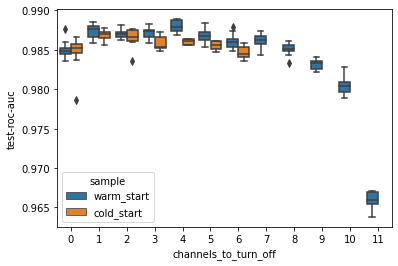

In [9]:
results_both['channels_to_turn_off'] = results_both['channels_to_turn_off'].astype(str)
sns.boxplot(data = results_both, y = 'test-roc-auc', x='channels_to_turn_off', hue = 'sample')